In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sn
import seaborn as sns
from math import sqrt, ceil, log2

In [128]:
seed = 421337

data = pd.read_csv('data.csv')
data

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [129]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

In [131]:
data.isnull().sum()

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64

In [132]:
X = data.drop(['GRADE', 'STUDENT ID'], axis=1)
y = data['GRADE']

In [133]:
# Отобрать случайным образом sqrt(n) признаков
columns = X.columns
columns = np.random.choice(columns, ceil(sqrt(len(columns))), replace=False)
X = X[columns]
X.head()

,13,21,22,10,3,5
0,3,1,1,1,3,1
1,2,1,1,1,3,1
2,2,1,1,2,2,2
3,5,1,1,2,1,1
4,2,1,1,4,1,2


In [134]:
# Разделение данных на обучающий и тестовый наборы

def _train_test_split(X, Y, seed, test_percent=0.2):
  random.seed(seed)
  random.shuffle(list(range(len(X))))

  test_size = int(len(X) * test_percent)

  x_train = X[test_size:]
  x_test = X[:test_size]
  y_train = Y[test_size:]
  y_test = Y[:test_size]

  return x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# x_train, x_test, y_train, y_test = _train_test_split(X, y, seed, 0.2)
x_train

,13,21,22,10,3,5
73,4,1,1,2,2,2
77,2,1,2,2,1,2
83,2,1,1,1,3,2
94,5,1,1,1,2,2
136,3,1,1,3,2,1
...,...,...,...,...,...,...
29,2,1,1,2,3,2
18,5,1,2,1,2,2
139,1,1,2,3,2,1
41,2,1,2,2,2,1


In [135]:
class Node:
    def __init__(self, feature, value):
        self.feature = feature
        self.value = value

    def pred(self, x):
        feature_value = x[self.feature]
        if feature_value in self.value:
            return self.value[feature_value].pred(x)
        else:
            # Если значение признака отсутствует, возвращаем предсказание по умолчанию
            # из первого дочернего узла
            first_child = next(iter(self.value.values()))
            return first_child.pred(x)

    def pred_proba(self, x):
        feature_value = x[self.feature]
        if feature_value in self.value:
            return self.value[feature_value].pred_proba(x)
        else:
            first_child = next(iter(self.value.values()))
            return first_child.pred_proba(x)

    def print_node(self, indent=0):
        for value, node in self.value.items():
            print(' ' * indent + f'{self.feature} == {value}:')
            node.print_node(indent + 2)

In [136]:
class Leaf(Node):
    def __init__(self, leaf_value, proba):
        super().__init__("", {})
        self.leaf_value = leaf_value
        self.proba = proba

    def pred(self, x):
        return self.leaf_value

    def pred_proba(self, x):
        return self.leaf_value, self.proba

    def print_node(self, indent=0):
        print(' ' * indent + f'-> class: {self.leaf_value} (prob: {self.proba:.3f})')


In [137]:
class DecisionTree():
  def __init__(self, columns: list[str]):
      self.columns = columns
      self.root = None

  def fit(self, x, y):
    # Построение дерева начинается с корня
    self.root = self.build_node(x[self.columns], y, DecisionTree.entropy(y))
    return self.root

  def pred(self, x):
     # Возвращаем предсказания для каждой строки входных данных
    return [self.root.pred(i) for i in x[self.columns].to_records()]

  def pred_proba(self, x):
    # Возвращаем предсказания с вероятностями для каждой строки входных данных
    return [self.root.pred_proba(i) for i in x[self.columns].to_records()]

  def print_tree(self):
    # Выводим дерево, начиная с корня
    self.root.print_node()

  @staticmethod
  def entropy(y):
    # Вычисляем энтропию для меток классов
    class_n = y.unique()
    res = 0
    for i in class_n:
      res -= (y.value_counts()[i] / len(y)) * log2(y.value_counts()[i] / len(y))
    return res

  def build_node(self, x, y, parent_entropy: float) -> Node:
    # Если в узле осталась метка только одного класса, создаем листовой узел
    if len(y.unique()) == 1:
      return Leaf(y.unique()[0], 1)

    # best_gain, best_gain_info, best_gain_col
    max_gain = 0
    gain_info = 0
    max_gain_column = ''

    # Поиск лучшего разбиения
    for column in self.columns:
        features_names =  pd.unique(x[column]) # x[column].unique()
        info = sum(x[column].value_counts()[feature] / len(x) * DecisionTree.entropy(y[x[column] == feature]) for feature in features_names)
        gain = parent_entropy - sum((len(y[x[column] == feature]) / len(y)) * DecisionTree.entropy(y[x[column] == feature]) for feature in features_names)

        # Обновляем параметры лучшего разбиения
        if parent_entropy - info > max_gain:
            max_gain = parent_entropy - info
            gain_info = info
            max_gain_column = column

    # Если разделить не удается, возвращаем листовой узел с самым частым классом
    if not max_gain_column:
        mode = y.mode()[0]
        return Leaf(mode, y.value_counts()[mode] / len(y))

    values = {}

    features_names = x[max_gain_column].unique()
    for feature in features_names:
        values[feature] = self.build_node(x[x[max_gain_column] == feature], y[x[max_gain_column] == feature], gain_info)

    return Node(max_gain_column, values)

# тренировка

model = DecisionTree(columns)
model.fit(x_train, y_train)
y_pred = model.pred(x_test)

print("Используются признаки:", *columns)
model.print_tree()

In [139]:
def accuracy(y_test, y_pred):
  return np.sum(y_test == y_pred) / len(y_test)
accuracy(y_test, y_pred)

np.float64(0.1724137931034483)

In [140]:
def confusion_matrix(pred_y, true_y):
    matrix = np.zeros((2, 2))
    for pred, true in zip(pred_y, true_y):
        pred = 1 if pred == 1 else 0
        true = 1 if true == 1 else 0
        matrix[pred][true] += 1

    return matrix

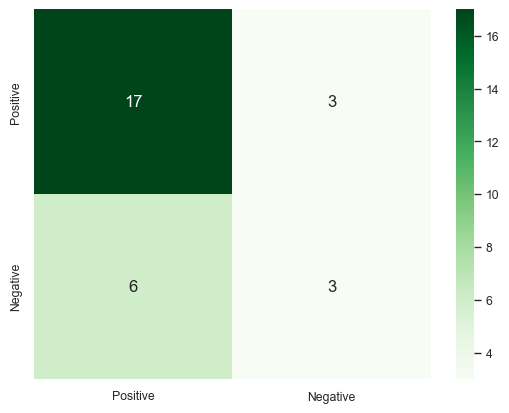

In [141]:
cm_indeces = ['Positive', 'Negative']
df_cm = pd.DataFrame(confusion_matrix(y_pred, y_test), index = cm_indeces, columns = cm_indeces)
sn.set_context("paper", rc={"font.size":12,"axes.titlesize":8,"axes.labelsize":5})
sn.heatmap(df_cm, annot=True, fmt='.0f', cmap="Greens")
plt.show()

In [142]:
def accuracy(conf):
    return (conf[1][1] + conf[0][0]) / (conf[1][1] + conf[0][0] + conf[1][0] + conf[0][1])

def precision(conf):
    return conf[1][1] / (conf[1][1] + conf[1][0])

def recall(conf):
    return conf[1][1] / (conf[1][1] + conf[0][1])

def tpr(conf):
    return recall(conf)

def fpr(conf):
    return conf[1][0] / (conf[1][0] + conf[0][0])

print("Accuracy: ", accuracy(confusion_matrix(y_pred, y_test)))
print("Precision: ", precision(confusion_matrix(y_pred, y_test)))
print("Recall: ", recall(confusion_matrix(y_pred, y_test)))

Accuracy:  0.6896551724137931
Precision:  0.3333333333333333
Recall:  0.5


,tpr,fpr
0,0.333333,0.130435
1,0.333333,0.130435
2,0.333333,0.130435
3,0.333333,0.130435
4,0.333333,0.130435
...,...,...
95,1.000000,0.869565
96,1.000000,0.869565
97,1.000000,0.869565
98,1.000000,0.869565


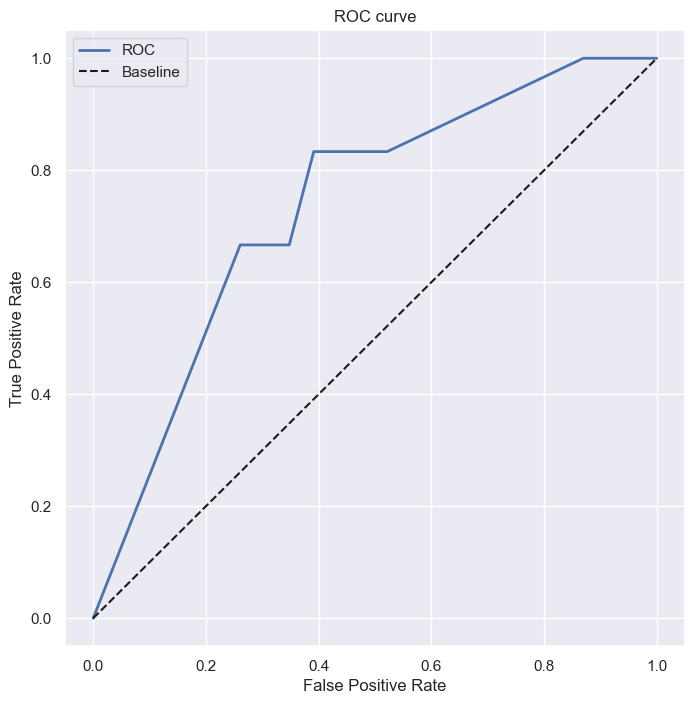

In [143]:
y_pred_proba = model.pred_proba(x_test)

def confusion_matrix_proba(y_pred_proba, true_y, threshold):
    matrix = np.zeros((2, 2))
    for pred_prob, true in zip(y_pred_proba, true_y):
        pred = 1 if pred_prob >= threshold else 0
        true = 1 if true == 1 else 0
        matrix[pred][true] += 1

    return matrix

def probas(y_pred_proba):
  return [prob if pred == 1 else 1 - prob for pred, prob in y_pred_proba]

def auc_roc_plot(y_pred_proba):
    sns.set(font_scale=1)
    sns.set_color_codes("muted")
    plt.figure(figsize=(8, 8))
    tpr_arr = []
    fpr_arr = []
    for th in np.arange(1, 0, -0.01):
        conf = confusion_matrix_proba(probas(y_pred_proba), y_test, th)
        tpr_arr.append(tpr(conf))
        fpr_arr.append(fpr(conf))
    display(pd.DataFrame({'tpr': tpr_arr, 'fpr': fpr_arr}))

    plt.plot([0] + fpr_arr + [1], [0] + tpr_arr + [1], lw=2, label='ROC')
    plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'k--', label='Baseline')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

auc_roc_plot(y_pred_proba)

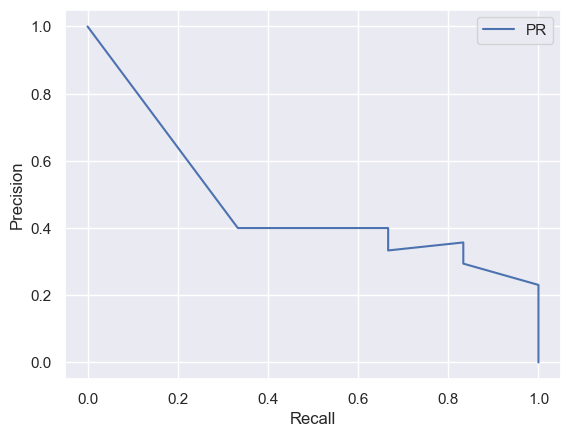

In [144]:
def auc_pr_plot(y_pred_proba):
  p = []
  r = []

  for th in np.arange(0, 1, 0.01):
    conf = confusion_matrix_proba(probas(y_pred_proba), y_test, th)
    p.append(precision(conf))
    r.append(recall(conf))

  plt.plot([1] + r + [0], [0] + p + [1], label='PR')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend()

auc_pr_plot(y_pred_proba)